In [2]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
data = pd.read_csv("../data/customer-churn-data.csv")

In [4]:
# Visualize the dataset

# 1. Display the column names
print(data.columns)

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'TotalSpend',
       'YearsAsCustomer', 'NumOfPurchases', 'AvgTransactionAmount',
       'NumOfReturns', 'NumOfSupportQueries', 'SatisfactionScore',
       'LastPurchaseDaysAgo', 'EmailOptIn', 'PromotionResponse', 'Churn'],
      dtype='object')


In [5]:
# 2. Display the first 5 rows of the dataset
print(data.head(5))

   CustomerID  Age Gender  AnnualIncome  TotalSpend  YearsAsCustomer  \
0           1   62  Other         45.15     5892.58                5   
1           2   65   Male         79.51     9025.47               13   
2           3   18   Male         29.19      618.83               13   
3           4   21  Other         79.63     9110.30                3   
4           5   21  Other         77.66     5390.88               15   

   NumOfPurchases  AvgTransactionAmount  NumOfReturns  NumOfSupportQueries  \
0              22                453.80             2                    0   
1              77                 22.90             2                    2   
2              71                 50.53             5                    2   
3              33                411.83             5                    3   
4              43                101.19             3                    0   

   SatisfactionScore  LastPurchaseDaysAgo  EmailOptIn PromotionResponse  Churn  
0                

In [6]:
# 4. Display the shape of the dataset
print(data.shape)

(1000, 15)


In [7]:
# 5. Display the data type of each column
print(data.dtypes)

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse        object
Churn                      bool
dtype: object


In [8]:
# 6. Display the number of missing values in each column
print(data.isnull().sum())

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64


In [9]:
# Drop Customer ID
data.drop("CustomerID", axis=1, inplace=True)

In [10]:
data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'TotalSpend', 'YearsAsCustomer',
       'NumOfPurchases', 'AvgTransactionAmount', 'NumOfReturns',
       'NumOfSupportQueries', 'SatisfactionScore', 'LastPurchaseDaysAgo',
       'EmailOptIn', 'PromotionResponse', 'Churn'],
      dtype='object')

Churn
True     526
False    474
Name: count, dtype: int64
Ratio of non-churned to churned customers:  0.9011406844106464


<Axes: xlabel='Churn', ylabel='count'>

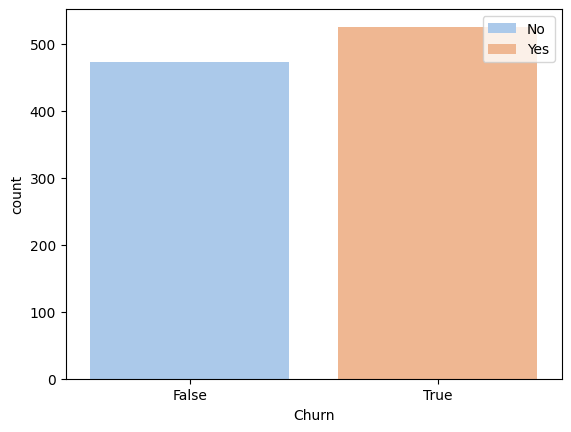

In [11]:
# Check for imbalance in the dataset
print(data["Churn"].value_counts())
print(
    "Ratio of non-churned to churned customers: ",
    data["Churn"].value_counts().min() / data["Churn"].value_counts().max(),
)
sns.barplot(
    x=data["Churn"].value_counts().index,
    y=data["Churn"].value_counts(),
    palette="pastel",
    hue=["Yes", "No"],
)

- The dataset is not **imbalanced**

<Axes: >

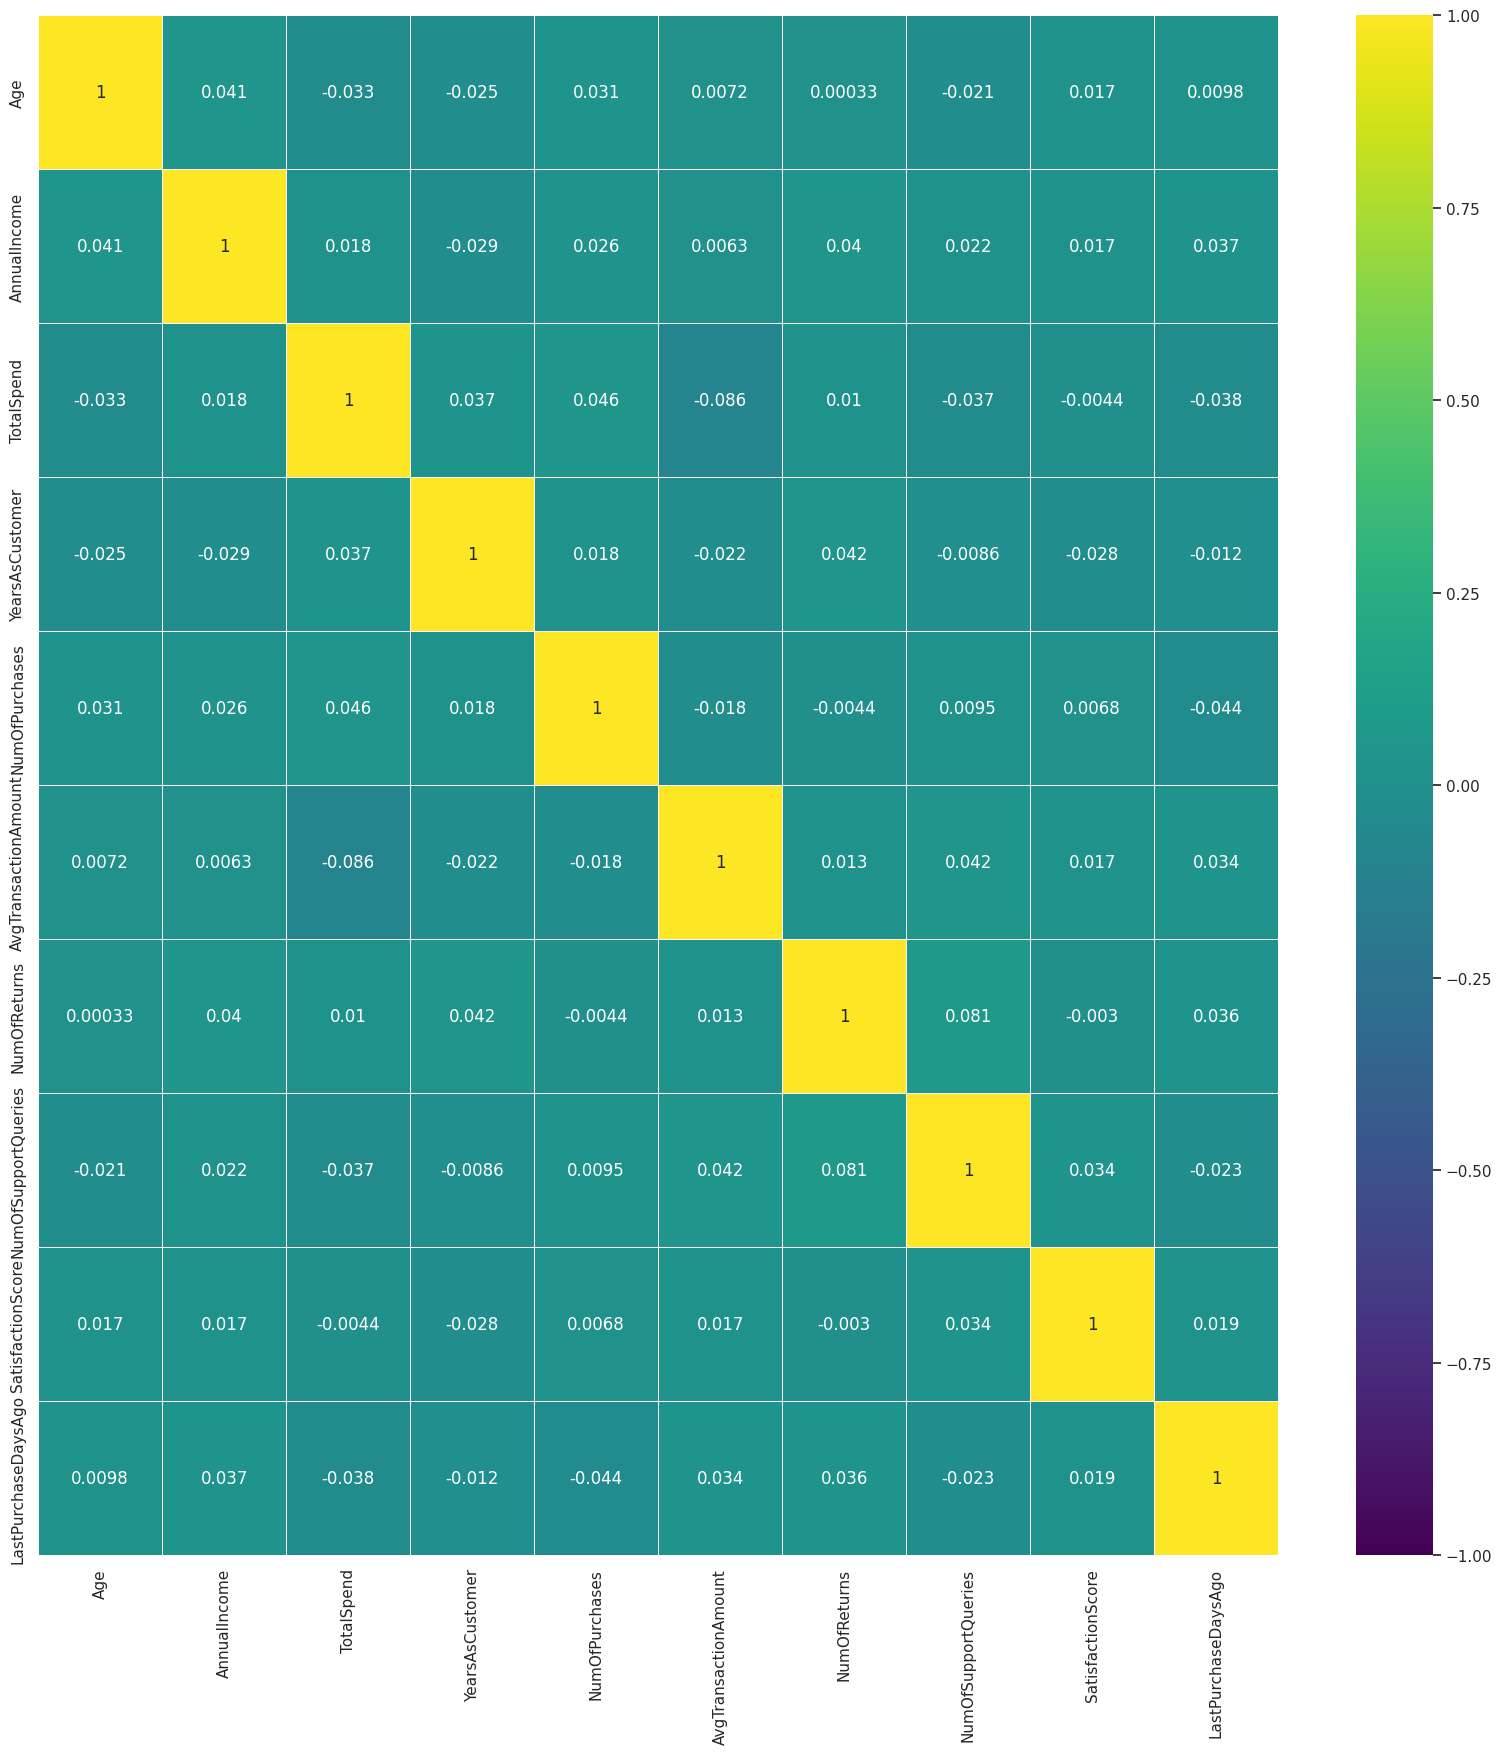

In [12]:
sns.set_theme(rc={"figure.figsize": (20, 20)})
sns.heatmap(
    data.select_dtypes(include=[int, float]).corr(),
    linewidths=0.5,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
)

<Axes: >

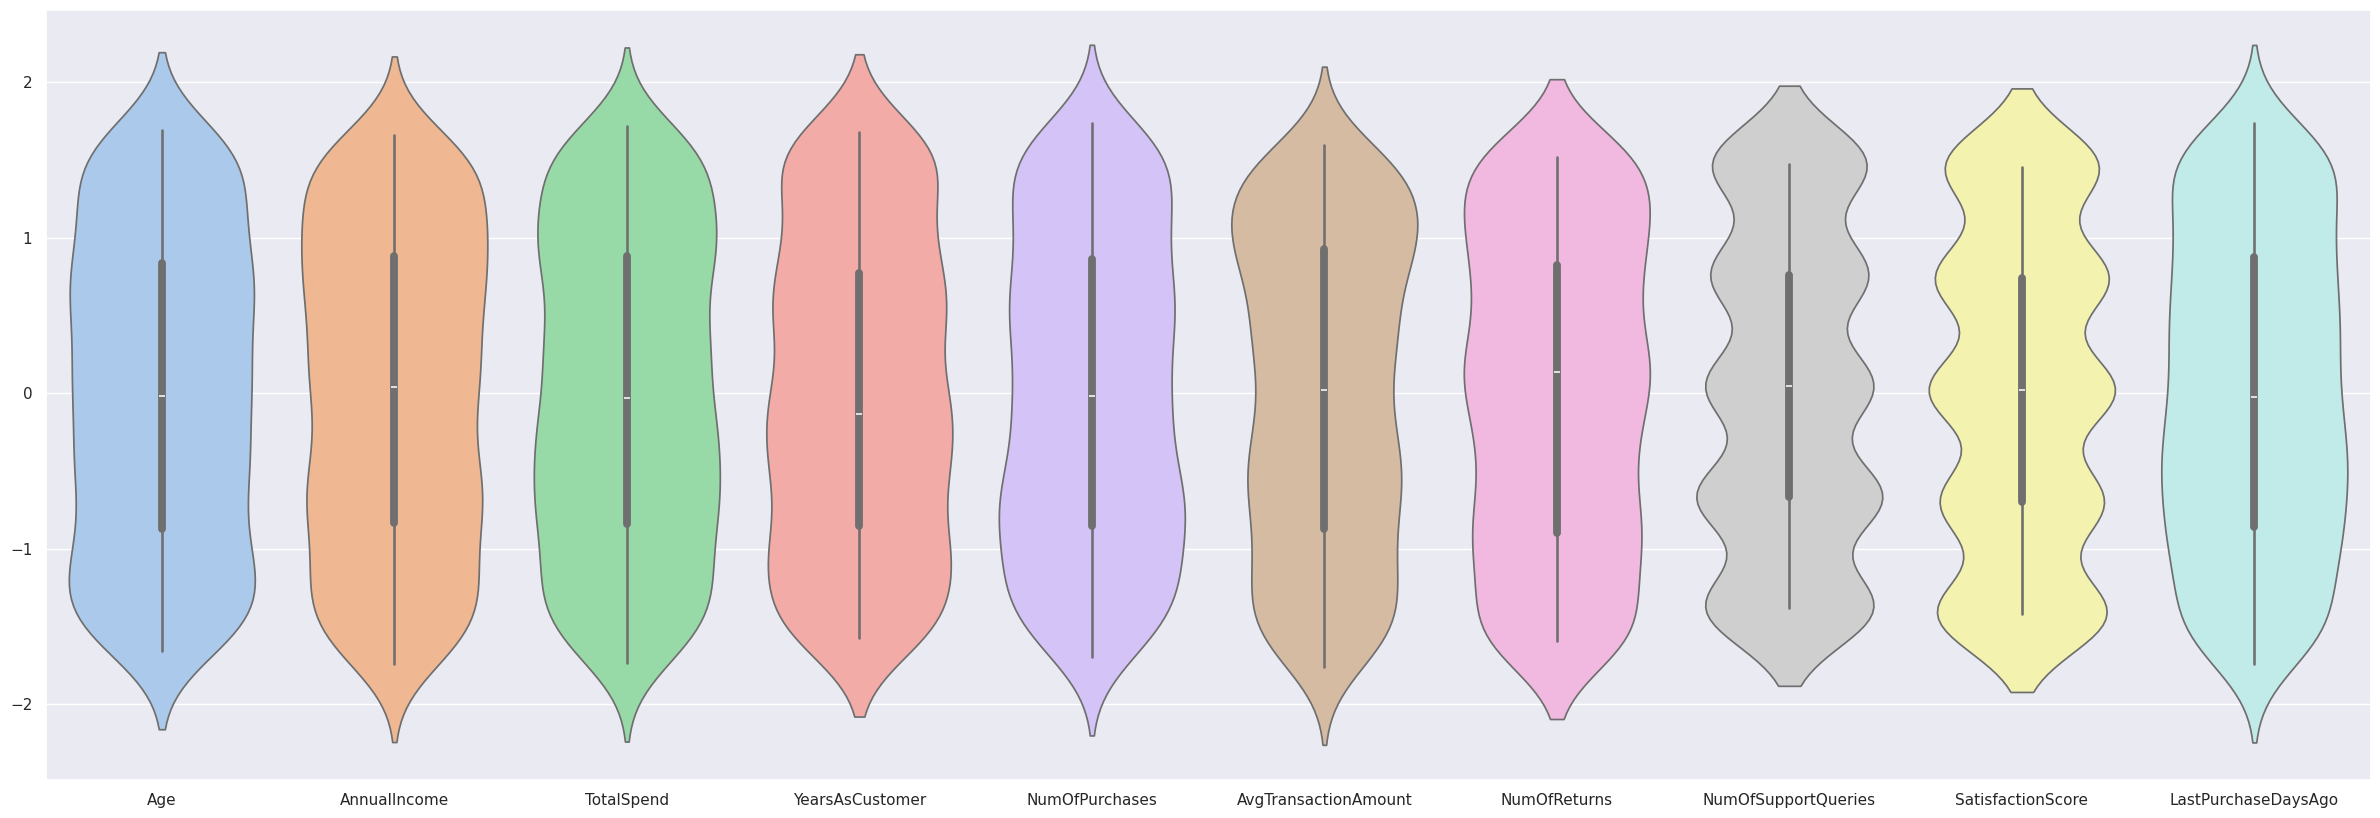

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[int, float]))
scaled_df = pd.DataFrame(
    scaled_data, columns=data.select_dtypes(include=[int, float]).columns
)
sns.set_theme(rc={"figure.figsize": (30, 10)})
sns.violinplot(data=scaled_df, palette="pastel", orient="v")

<Axes: >

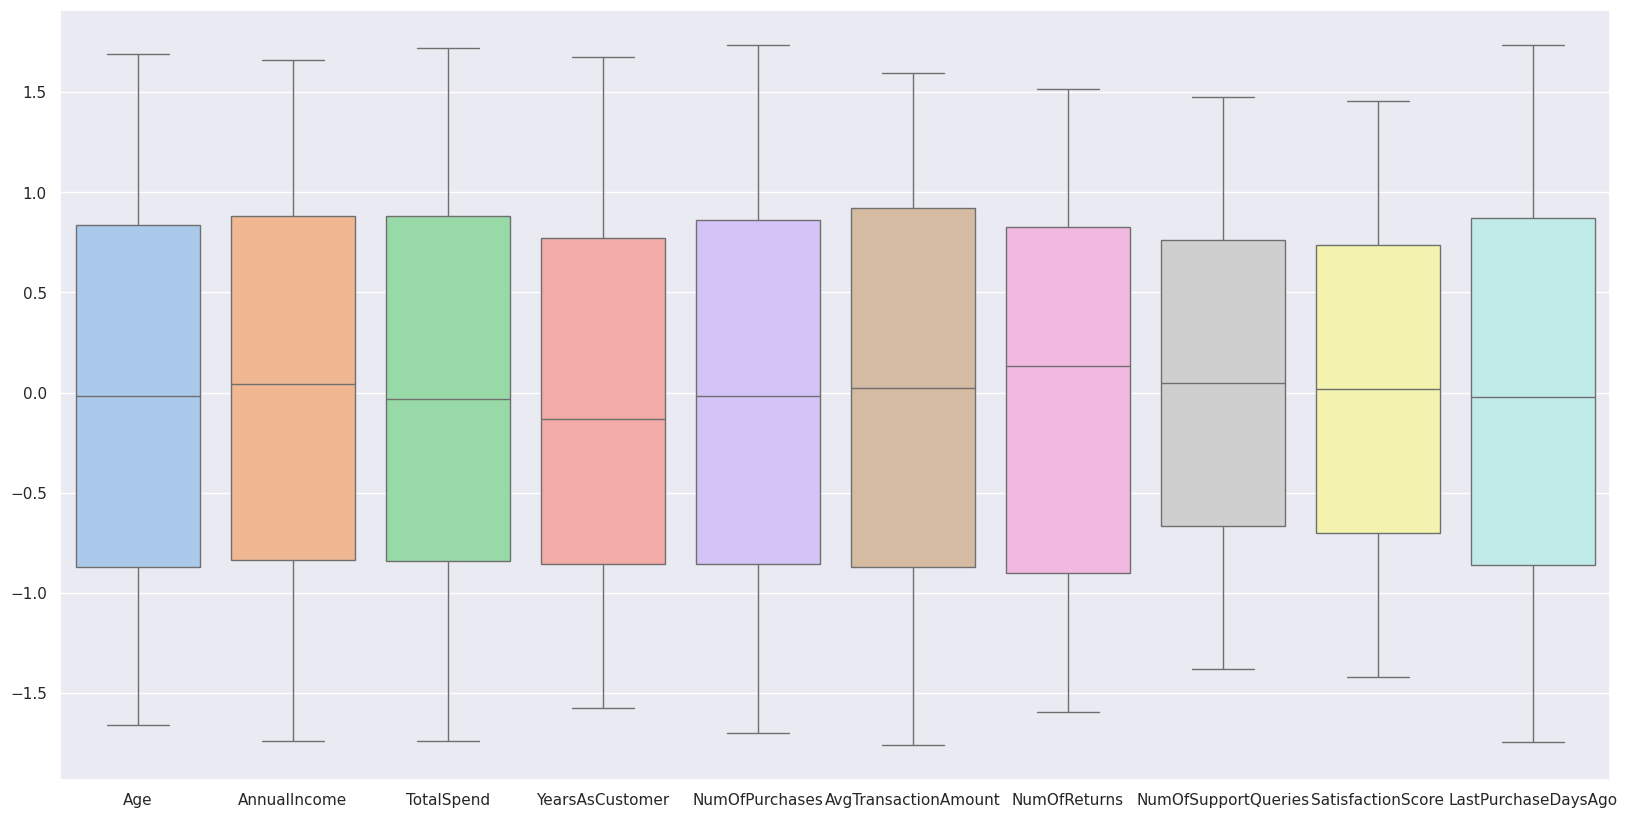

In [14]:
# Box plot for the scaled data
sns.set_theme(rc={"figure.figsize": (20, 10)})
sns.boxplot(data=scaled_df, palette="pastel", orient="v")

<Axes: >

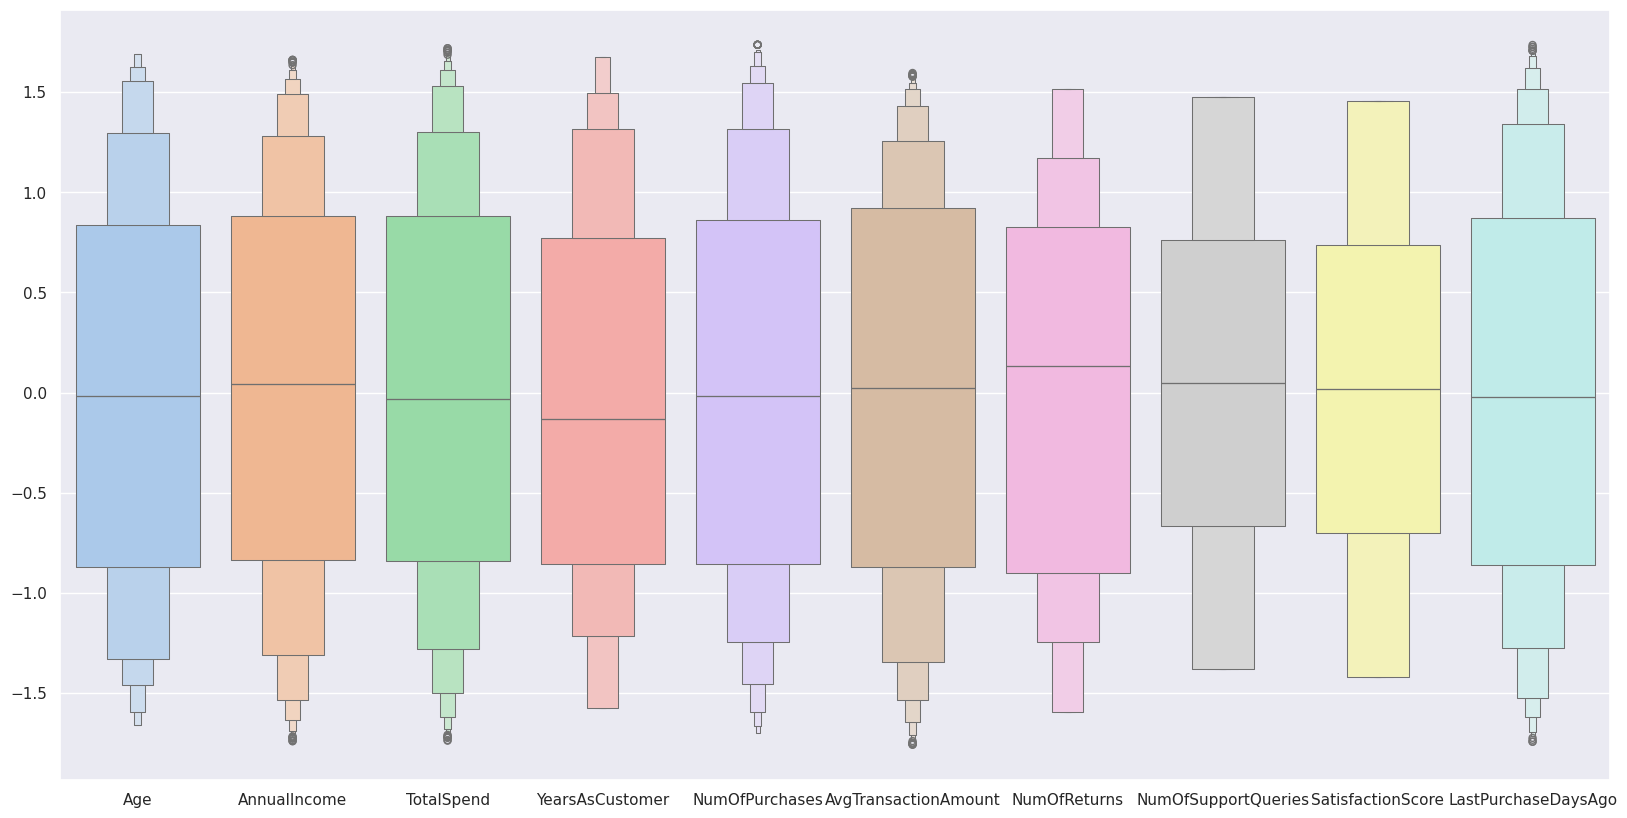

In [15]:
sns.boxenplot(data=scaled_df, palette="pastel", orient="v")

## No outliers detected

In [153]:
# Check for categorical columns
print(data.select_dtypes(include=["object"]).columns)

Index(['Gender', 'PromotionResponse'], dtype='object')


In [154]:
# Check possible values for categorical columns
print(data["Gender"].value_counts())
print("")
print(data["PromotionResponse"].value_counts())

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

PromotionResponse
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64


In [155]:
# Convert categorical columns to numerical
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[["Gender", "PromotionResponse"]])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(["Gender", "PromotionResponse"]),
)
print(encoded_df.head())

   Gender_Female  Gender_Male  Gender_Other  PromotionResponse_Ignored  \
0            0.0          0.0           1.0                        0.0   
1            0.0          1.0           0.0                        0.0   
2            0.0          1.0           0.0                        0.0   
3            0.0          0.0           1.0                        1.0   
4            0.0          0.0           1.0                        0.0   

   PromotionResponse_Responded  PromotionResponse_Unsubscribed  
0                          1.0                             0.0  
1                          1.0                             0.0  
2                          1.0                             0.0  
3                          0.0                             0.0  
4                          0.0                             1.0  


In [156]:
# Drop the original categorical columns
data.drop("Gender", axis=1, inplace=True)
data.drop("PromotionResponse", axis=1, inplace=True)

In [157]:
# Concatenate the original dataset with the encoded columns
data = pd.concat([data, encoded_df], axis=1)
print(data.head())

   Age  AnnualIncome  TotalSpend  YearsAsCustomer  NumOfPurchases  \
0   62         45.15     5892.58                5              22   
1   65         79.51     9025.47               13              77   
2   18         29.19      618.83               13              71   
3   21         79.63     9110.30                3              33   
4   21         77.66     5390.88               15              43   

   AvgTransactionAmount  NumOfReturns  NumOfSupportQueries  SatisfactionScore  \
0                453.80             2                    0                  3   
1                 22.90             2                    2                  3   
2                 50.53             5                    2                  2   
3                411.83             5                    3                  5   
4                101.19             3                    0                  5   

   LastPurchaseDaysAgo  EmailOptIn  Churn  Gender_Female  Gender_Male  \
0                  129   

In [158]:
# Check for categorical columns
print(data.select_dtypes(include=["object"]).columns)

Index([], dtype='object')


In [159]:
# Split the dataset into train, and test sets
train, test = train_test_split(data, test_size=0.20, random_state=42)

In [160]:
# Save the train, and test sets
train.to_csv("../data/train.csv", index=False)
test.to_csv("../data/test.csv", index=False)